# Decision Tree Regressor

This is our first model to predict the claims, you will see a lot of scikit learn, which is quick and reliable but then we'll do a from-scratch version in the most Nara Smith way with only NumPy to show that we _know_ what we are doing😌

__First the libraries__

In [2]:
import os, sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import numpy as np
from src.decision_tree_from_scratch import DecisionTreeRegressorScratch


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

__Now we prep the data__

In [3]:
data = pd.read_csv('../data/claims_train.csv')

y = data['ClaimNb']
X = data.drop(columns = ['IDpol', 'ClaimNb'])


X = pd.get_dummies(X, drop_first=True)
#transormamos valores categóricos flow palabras en números --> alto = 1 bajo = 0.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Aqui estamos estandarizando las dummy variables que hemos hecho antes, en plan estamos poniéndolas en una standard distribution bell; no entiendo muy bien esta librería pero
#funciona, entonces messirve



X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.2, random_state=42
)

__Here we train a Decision Tree model__

But the library version, we'll do a Nara Smith style one later on

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

tree = DecisionTreeRegressor(max_depth=5, random_state=42)

tree.fit(X_train, y_train)

y_pred =tree.predict(X_test)

mse =mean_squared_error(y_test, y_pred)
r2 =r2_score(y_test, y_pred)

print('Decision Tree Results:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Decision Tree Results:
Mean Squared Error: 0.0563
R^2 Score: 0.0253


__This is just to visualize the tree thing, it's easier for me if i can actually see it ngl gang__

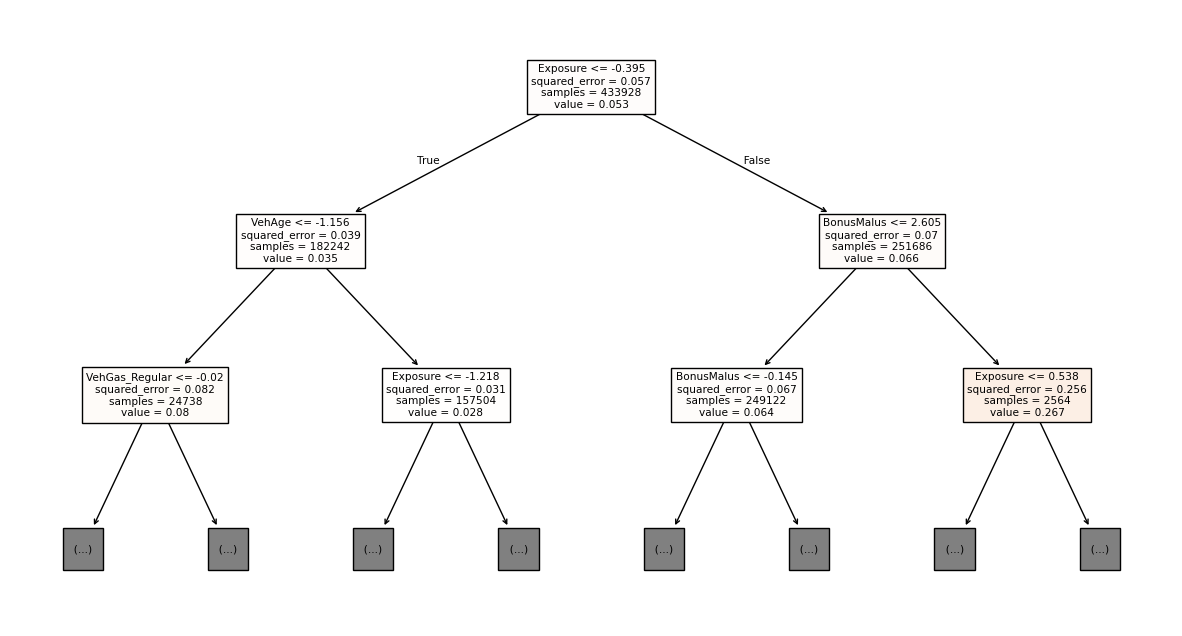

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plot_tree(tree, filled=True, feature_names=X.columns, max_depth=2)
plt.show()

__This now is to test the Nara Smith decision tree, so like dw about it rn, we're just testing it.__

In [6]:
tree_scratch = DecisionTreeRegressorScratch(
    max_depth=5,                # controls complexity
    min_samples_split=100,      # avoids overfitting
    min_impurity_decrease=1e-7,
    random_state=42
)

tree_scratch.fit(X_train, y_train)

# make predictions on test data
y_pred = tree_scratch.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree (from scratch) Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Decision Tree (from scratch) Results:
Mean Squared Error: 0.0562
R² Score: 0.0262
